In [1]:
import math
import random as rnd
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import pandas as pd
from IPython.display import clear_output
import time
from scipy import stats

debug = False
plt.rcParams["figure.figsize"] = (8,8)  

In [24]:
class Agent:

    def __init__(self,id,state):
        self.id = id
        self.state = state
        self.links = []
        self.pos = [rnd.randint(0,20),rnd.randint(0,20)]
        
    def add_link(self,agent):
        if agent not in self.links:
            self.links.append(agent)
            
    def majority(self):
        states = [a.state for a in self.links]
        
        new_state = self.state
        if len(states)>0:
            items = set(states)
            c_max= 0
            point = 0
            for i in items:
                c = states.count(i)
                if (c> c_max) or (c==c_max and rnd.random()<0.5) :
                    c_max = c
                    point = i
            new_state = point
        if debug :print(self.id,self.state,states,new_state)
        changed = self.state != new_state
        self.state = new_state
        return changed
                
                
                
        
        

In [27]:
class Population:
    def __init__(self,number_of_agents,number_of_links):
        self.agents= [Agent(i,rnd.randint(0,3)) for i in range(number_of_agents)]
        self.net_agents = [a for a in self.agents]
        self.network = nx.erdos_renyi_graph(number_of_agents,number_of_links/number_of_agents)
        edges = list(self.network.edges())
        self.pos = nx.circular_layout(self.network)
        #self.pos = nx.random_layout(self.network)
        for edge in edges:
            a1 = self.agents[edge[0]]
            a2 = self.agents[edge[1]]
            a1.add_link(a2)
            a2.add_link(a1)
        
    def iterate(self):
        rnd.shuffle(self.agents)
        flag = False
        for a in self.agents:
            f = a.majority()
            if f==True:
                flag = True
        return flag
            
    def draw_network(self):
        cols = ["red","green","blue","yellow"]
        colors = [cols[a.state] for a in self.net_agents]
        pos = [(a.pos[0],a.pos[1]) for a in self.agents]
        nx.draw_networkx(self.network,pos=pos,node_color = colors, with_labels=True, node_size=250,width=0.2,font_size=8) 
        plt.show()

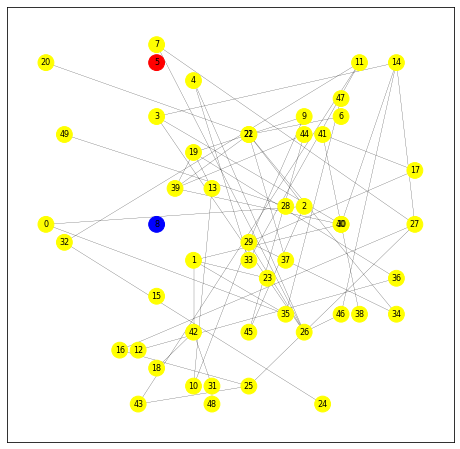

done 23


In [28]:
debug = False
population = Population(50,2)
print("Start")
flag = True
count = 0
rep=0
while flag and count<200:
    f = population.iterate()
    if f :
        rep =0
    else:
        rep += 1
    if rep == 4:
        flag = False
    if not debug :clear_output(wait=True)
    population.draw_network()
    if not debug :time.sleep(0.1)
    count+=1
print("done",count)